<a href="https://colab.research.google.com/github/adamgrzanek/-Alzheimer-s-predictions/blob/main/projekt_ag__Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification - Alzheimer's dataset

1. [Libraries import](#a1)
2. [Load the data and unzip file](#a2)
3. [Check the classes](#a3)
4. [Check the number of files in a given directory](#a4)
5. [Create a validation directory](#a5)
6. [Move n % training files to validation directory](#a6)
7. [Recheck the number of files in the directory](#a7)
8. [Augmentation](#a8)
9. [Data explore](#a9)
10. [ANN model (Artificial Neural Network)](#a10)
11. [CNN model (Convolutional Neural Network)](#a11)
12. [History graph](#a12)
13. [Evaluation of the model on test data](#a13)



https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

### <a name='a1'></a> Libraries import

In [18]:
import os
import pandas as pd 
import numpy as np 

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers


import matplotlib.pyplot as plt
import plotly.graph_objects as go
from random import randint

import shutil 
from sklearn.metrics import confusion_matrix, classification_report

### <a name='a2'></a> Load the data and unzip file

download zip file from https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images?resource=download

next load archive.zip

In [19]:
pwd

'/content'

In [23]:
ls

archive.zip  sample_data/


In [24]:
#!unzip -q Alzheimer_s_Dataset.zip
!unzip -q archive.zip

In [25]:
ls

'Alzheimer_s Dataset'/   archive.zip   sample_data/


In [17]:
#!rm -rf ./Alzheimer_s_Dataset

### <a name='a3'></a> Check the classes

In [26]:
classes = os.listdir('/content/Alzheimer_s Dataset/train')
classes

['ModerateDemented', 'VeryMildDemented', 'MildDemented', 'NonDemented']

### <a name='a4'></a> Check the number of files in a given directory

In [27]:
train_dir = '/content/Alzheimer_s Dataset/train'
train_no_of_files = {} # empty dictionary

#classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

for dir in classes:
    train_no_of_files[dir] = len(os.listdir(os.path.join(train_dir, dir))) # add data to dict

train_no_of_files.items()

dict_items([('ModerateDemented', 52), ('VeryMildDemented', 1792), ('MildDemented', 717), ('NonDemented', 2560)])

In [28]:
test_dir = '/content/Alzheimer_s Dataset/test'

test_no_of_files = {}

for dir in classes:
    test_no_of_files[dir] = len(os.listdir(os.path.join(test_dir, dir)))

test_no_of_files.items()

dict_items([('ModerateDemented', 12), ('VeryMildDemented', 448), ('MildDemented', 179), ('NonDemented', 640)])

In [29]:
print('Training set:')
for name, number_of_images in train_no_of_files.items():
    print(f'{name} -> {number_of_images}')


print('\nTest set:')
for name, number_of_images in test_no_of_files.items():
    print(f'{name} -> {number_of_images}')    

Training set:
ModerateDemented -> 52
VeryMildDemented -> 1792
MildDemented -> 717
NonDemented -> 2560

Test set:
ModerateDemented -> 12
VeryMildDemented -> 448
MildDemented -> 179
NonDemented -> 640


### <a name='a5'></a> Create a validation directory

In [30]:
valid_dir = '/content/Alzheimer_s Dataset/valid'

if os.path.exists(valid_dir):
    shutil.rmtree(valid_dir)

os.mkdir(valid_dir)

### <a name='a6'></a> Move n % training files to validation directory

In [31]:
n = 0.15

for k, v in train_no_of_files.items():
    valid_n = int(np.floor(n * v)) # percent of validation data (15%)    
    print(f'Class: {k}  \nnumber of images: {v}  \nnumber of validation images: {valid_n}')
    
    idx_random_image = np.random.choice(range(v-1), size=valid_n, replace=False) # random index
    
    os.mkdir(os.path.join(valid_dir, k)) # create directory given class

    files_to_delete = [] # empty list (files to be deleted after copying)

    for idx in idx_random_image:
        file_to_move = os.listdir(f'{train_dir}/{k}')[idx]
        
        source = os.path.join(train_dir, k, file_to_move)
        destination = os.path.join(valid_dir, k, file_to_move)
        
        shutil.copy(src=source, dst=destination)
        files_to_delete.append(source)
    
    for path in files_to_delete:
        os.remove(path)
    print('\n')

Class: ModerateDemented  
number of images: 52  
number of validation images: 7


Class: VeryMildDemented  
number of images: 1792  
number of validation images: 268


Class: MildDemented  
number of images: 717  
number of validation images: 107


Class: NonDemented  
number of images: 2560  
number of validation images: 384




### <a name='a7'></a> Recheck the number of files in the directory

In [32]:
train_no_of_files = {} 

for dir in classes:
    train_no_of_files[dir] = len(os.listdir(os.path.join(train_dir, dir)))


val_no_of_files = {}

for dir in os.listdir(valid_dir):
    val_no_of_files[dir] = len(os.listdir(os.path.join(valid_dir, dir)))


test_no_of_files = {}

for dir in classes:
    test_no_of_files[dir] = len(os.listdir(os.path.join(test_dir, dir)))

In [33]:
print('Training set:')
for name, number_of_images in train_no_of_files.items():
    print(f'{name} -> {number_of_images}')


print('\nValidation set:')
for name, number_of_images in val_no_of_files.items():
    print(f'{name} -> {number_of_images}')    


print('\nTest set:')
for name, number_of_images in test_no_of_files.items():
    print(f'{name} -> {number_of_images}')    

Training set:
ModerateDemented -> 45
VeryMildDemented -> 1524
MildDemented -> 610
NonDemented -> 2176

Validation set:
ModerateDemented -> 7
VeryMildDemented -> 268
MildDemented -> 107
NonDemented -> 384

Test set:
ModerateDemented -> 12
VeryMildDemented -> 448
MildDemented -> 179
NonDemented -> 640


### <a name='a8'></a> Augmentation

In [34]:
# more data (modification only on training set)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range = [0.8, 1.2],   
    zoom_range=[.99, 1.01],          
    data_format = 'channels_last',
    fill_mode='constant',            
    horizontal_flip=True             
)

# standardized data
valid_datagen = ImageDataGenerator(rescale=1./255.) 



train_generator = train_datagen.flow_from_directory(directory=train_dir, 
                                                   target_size=(176, 176),
                                                   batch_size=64,
                                                   shuffle=True,
                                                   class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(176, 176),
                                                   batch_size=64,
                                                   class_mode='categorical')

Found 4355 images belonging to 4 classes.
Found 766 images belonging to 4 classes.


### <a name='a9'></a> Data explore

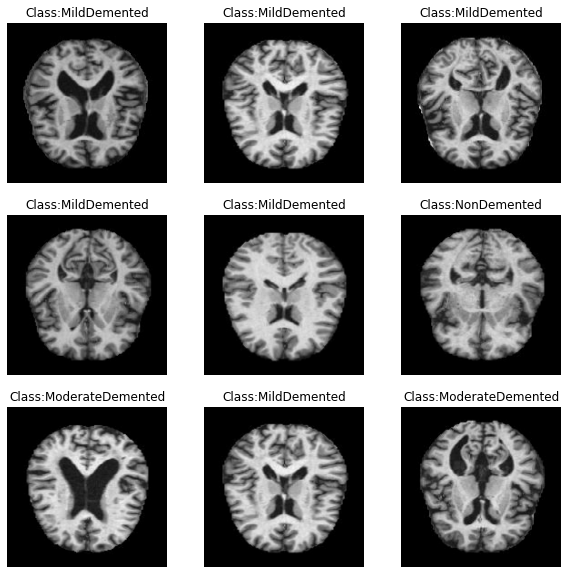

In [35]:
def show_images(generator,y_pred=None):
  
    labels = dict(zip([0,1,2,3], classes))
    
    x,y = generator.next()
    
    # show a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0,50)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_generator)

### <a name='a10'></a> ANN model (Artificial Neural Network)

In [ ]:
train_data, train_labels = train_generator.next()

In [ ]:
print(train_data.shape, train_labels.shape)

(4000, 176, 176, 3) (4000, 4)


In [ ]:
val_data, val_labels = valid_generator.next()

In [ ]:
print(val_data.shape, val_labels.shape)

(766, 176, 176, 3) (766, 4)


In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [176,176,3]),  
keras.layers.Dense(100, activation = 'relu' ),                               
keras.layers.Dense(200, activation = 'relu' ),
keras.layers.Dense(200, activation = 'relu' ),
keras.layers.Dense(200, activation = 'relu' ),
keras.layers.Dense(200, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])

# keras.layers.Dense(64, activation = 'relu' ),                               
# keras.layers.Dense(128, activation = 'relu' ),
# keras.layers.Dense(128, activation = 'relu' ),
# keras.layers.Dense(128, activation = 'relu' ),
# keras.layers.Dense(128, activation = 'relu' ),
# keras.layers.Dense(4, activation = 'softmax')])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(),
              #metrics=[keras.metrics.AUC(name='auc')]) # Area under the curve
              metrics=['accuracy', keras.metrics.AUC(name='auc')])

# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=50)#, callbacks=[callback])

Epoch 1/50
125/125 [==============================] - 25s 202ms/step - loss: 0.6899 - accuracy: 0.6758 - auc: 0.9071 - val_loss: 0.7265 - val_accuracy: 0.6488 - val_auc: 0.8991
Epoch 2/50
125/125 [==============================] - 26s 205ms/step - loss: 0.6558 - accuracy: 0.7020 - auc: 0.9158 - val_loss: 0.8128 - val_accuracy: 0.6279 - val_auc: 0.8766
Epoch 3/50
125/125 [==============================] - 26s 208ms/step - loss: 0.6918 - accuracy: 0.6777 - auc: 0.9069 - val_loss: 0.7906 - val_accuracy: 0.6423 - val_auc: 0.8878
Epoch 4/50
125/125 [==============================] - 24s 193ms/step - loss: 0.6915 - accuracy: 0.6900 - auc: 0.9094 - val_loss: 0.7612 - val_accuracy: 0.6384 - val_auc: 0.8922
Epoch 5/50
125/125 [==============================] - 25s 200ms/step - loss: 0.6475 - accuracy: 0.7028 - auc: 0.9174 - val_loss: 0.9899 - val_accuracy: 0.5901 - val_auc: 0.8661
Epoch 6/50
125/125 [==============================] - 25s 197ms/step - loss: 0.6974 - accuracy: 0.6892 - auc: 0.907

### Go to 'History graph' and 'Evaluation of the model on test data' section.

### <a name='a11'></a> CNN model (Convolutional Neural Network)

In [ ]:
# batch_size = 32
# steps_per_epoch = train_size // batch_size
# validation_steps = valid_size // batch_size

batch_size = 32

# let's assume:
train_size = 1000
valid_size = 200

steps_per_epoch = train_size // batch_size 
validation_steps = valid_size // batch_size

print(f'steps per epoch: {steps_per_epoch}')
print(f'validation steps: {validation_steps}')

steps per epoch: 31
validation steps: 6


In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(176, 176, 3)))                                                      
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=4, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 174, 174, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 20, 20, 128)     

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[es])

<ipython-input-72-8899eff3d870>:10: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/30
31/31 [==============================] - 166s 5s/step - loss: 1.2383 - accuracy: 0.4496 - val_loss: 1.0496 - val_accuracy: 0.4948
Epoch 2/30
31/31 [==============================] - 162s 5s/step - loss: 1.0619 - accuracy: 0.4884 - val_loss: 1.0255 - val_accuracy: 0.5078
Epoch 3/30
31/31 [==============================] - 159s 5s/step - loss: 1.0535 - accuracy: 0.4854 - val_loss: 0.9270 - val_accuracy: 0.5078
Epoch 4/30
31/31 [==============================] - 164s 5s/step - loss: 1.0119 - accuracy: 0.5205 - val_loss: 0.8983 - val_accuracy: 0.5078
Epoch 5/30
31/31 [==============================] - 159s 5s/step - loss: 0.9605 - accuracy: 0.5499 - val_loss: 0.9000 - val_accuracy: 0.5521
Epoch 6/30
31/31 [==============================] - 158s 5s/step - loss: 0.9288 - accuracy: 0.5439 - val_loss: 0.8553 - val_accuracy: 0.6146
Epoch 7/30
31/31 [==============================] - 168s 5s/step - loss: 0.9185 - accuracy: 0.5393 - val_loss: 0.8738 - val_accuracy: 0.6146
Epoch 8/30
31

### <a name='a12'></a> History graph

In [ ]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epochs', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epochs', yaxis_title='Loss', yaxis_type='log')
    fig.show()

In [ ]:
plot_hist(history)

### <a name='a13'></a> Evaluation of the model on test data

In [ ]:
test_dir

'/content/Alzheimer_s_Dataset/test'

In [ ]:
# scale all test images 1/255
test_datagen = ImageDataGenerator(rescale=1./255.) # only for test set (standardized data)


test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(176, 176),   
    batch_size=1,
    class_mode='categorical', 
    shuffle=False             
)


# `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
# y_prob = model.predict_generator(test_generator, test_generator.samples)
# y_prob 

y_prob = model.predict(x=test_generator, batch_size=test_generator.samples)
y_prob # Generates output predictions for the input samples.

Found 1279 images belonging to 4 classes.
1279/1279 [==============================] - 32s 25ms/step


array([[9.10159111e-01, 2.30848696e-09, 4.09929827e-02, 4.88478616e-02],
       [8.79576564e-01, 1.12738388e-08, 1.04590304e-01, 1.58331096e-02],
       [9.17840898e-01, 4.25114499e-10, 6.37229346e-03, 7.57867545e-02],
       ...,
       [2.15874746e-01, 7.28712592e-04, 1.06125727e-01, 6.77270830e-01],
       [5.47876179e-01, 5.17948829e-02, 3.48750986e-02, 3.65453809e-01],
       [7.86201715e-01, 6.71980977e-02, 2.09975988e-02, 1.25602558e-01]],
      dtype=float32)

In [ ]:
# np.argmax -> Returns the indices of the maximum values along an axis.    array([[0.995625, 0.00251 , 0.001865]]) -> 0
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([0, 0, 0, ..., 3, 0, 0])

In [ ]:
# real labels
y_true = test_generator.classes
y_true

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[131,   0,  22,  26],
       [  9,   2,   0,   1],
       [ 87,   2, 444, 107],
       [144,   0, 130, 174]])

In [ ]:
def plot_confusion_matrix(cm):
    
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=600, height=600, title='Confusion Matrix', font_size=10)
    fig.show()

import plotly.figure_factory as ff
plot_confusion_matrix(cm)
# vertical - real label;  horizontal prediction label

In [ ]:
# classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

                  precision    recall  f1-score   support

    MildDemented       0.35      0.73      0.48       179
ModerateDemented       0.50      0.17      0.25        12
     NonDemented       0.74      0.69      0.72       640
VeryMildDemented       0.56      0.39      0.46       448

        accuracy                           0.59      1279
       macro avg       0.54      0.50      0.48      1279
    weighted avg       0.62      0.59      0.59      1279

